In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [4]:
data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [5]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


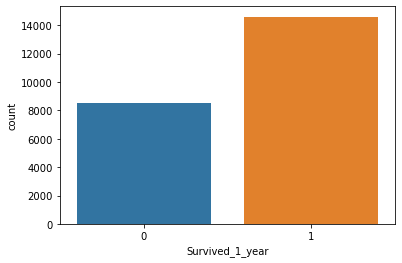

In [6]:
#lets plot the target variable
sns.countplot(x='Survived_1_year', data=data)
plt.show()

In [7]:
# exploratary data analysis
number_features = data.select_dtypes(include=[np.number])
number_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [8]:
#lets remove some of columns
number_data=data[['Diagnosed_Condition','Patient_Age','Patient_Body_Mass_Index','Number_of_prev_cond', 'Survived_1_year']]
number_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


In [9]:
#null values
number_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1235
Survived_1_year               0
dtype: int64

In [10]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])

number_data['Number_of_prev_cond'] = data['Number_of_prev_cond']
number_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [11]:
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Patient_Age              23097 non-null  int64  
 2   Patient_Body_Mass_Index  23097 non-null  float64
 3   Number_of_prev_cond      23097 non-null  float64
 4   Survived_1_year          23097 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 902.4 KB


In [12]:
number_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,26.413127,33.209768,23.454820,1.710352,0.632247
std,15.030865,19.549882,3.807661,0.768216,0.482204
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000
50%,26.000000,33.000000,23.386199,2.000000,1.000000
75%,39.000000,50.000000,26.788154,2.000000,1.000000
max,52.000000,149.000000,29.999579,5.000000,1.000000


<AxesSubplot:>

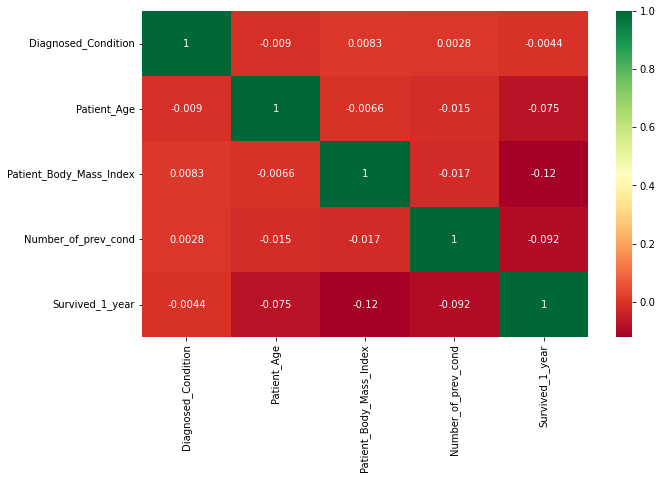

In [13]:
corrmat = number_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [14]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

In [15]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [16]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [17]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [18]:

categorical_data = data.drop(number_data.columns, axis=1)
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace=True)
categorical_data.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DX6,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
categorical_data.nunique()

Treated_with_drugs          32
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
dtype: int64

In [20]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [21]:
data = pd.concat([data, drugs], axis=1)
data = data.drop('Treated_with_drugs', axis=1)
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [22]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [23]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] ='NO'

In [24]:
data.drop('Patient_mental_condition', axis=1, inplace=True)


In [25]:
data = pd.get_dummies(data, columns=['Patient_Smoker','Patient_Rural_Urban'])

In [26]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Patient_Age                23097 non-null  int64  
 4   Patient_Body_Mass_Index    23097 non-null  float64
 5   A                          23097 non-null  float64
 6   B                          23097 non-null  float64
 7   C                          23097 non-null  float64
 8   D                          23097 non-null  float64
 9   E                          23097 non-null  float64
 10  F                          23097 non-null  float64
 11  Z                          23097 non-null  float64
 12  Number_of_prev_cond        23097 non-null  float64
 13  Survived_1_year            23097 non-null  int

In [28]:
data.drop(['ID_Patient_Care_Situation'], axis=1, inplace=True)

In [29]:
# prepare train and test data
x = data.drop('Survived_1_year', axis=1)
y = data['Survived_1_year']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
pred = model.predict(x_test)

In [33]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, f1_score
print(f1_score(y_test,pred))

0.7874015748031497


In [35]:
# Random Forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [36]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [37]:
y_pred = forest.predict(x_test)
fscore = f1_score(y_test, y_pred)
fscore

0.8220447284345048

In [38]:
# from the session feature selection
#Boruta by default uses random forest although it works with other algorithms
from boruta import BorutaPy

In [39]:
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(x_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x1C55287AE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1C55287AE40, verbose=2)

In [42]:
print("Selected Features: ", boruta_selector.support_)

# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True False  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 2 1 1 1 1 3 1 4 5 6 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  17


In [43]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


In [44]:
x_important_train = boruta_selector.transform(np.array(x_train))
x_important_test = boruta_selector.transform(np.array(x_test))

In [45]:
rf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)
rf_important.fit(x_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=1)

In [46]:
y_important_pred = rf_important.predict(x_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)

In [47]:
print(rf_imp_fscore)

0.8574817827486867


In [48]:
# to increase my model accuracy i will use hyper parameter tunning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]
}

In [49]:
rf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator= rf, param_grid = param_grid, cv = 2, n_jobs=-1, verbose=2)

In [50]:
grid_search.fit(x_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [51]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [52]:
pred = grid_search.predict(x_important_test)


In [53]:
f1_score(y_test, pred)

0.8657267539442766

In [54]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [55]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
test_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [57]:
drugs = test_data['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [58]:
test_data = pd.concat([test_data, drugs], axis=1)
test_data = test_data.drop('Treated_with_drugs', axis=1)
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,29.443894,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,23216,52,986,24,26.836321,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,7149,32,3292,42,27.171155,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [59]:
test_data.Patient_Smoker.value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [60]:
test_data.drop('Patient_mental_condition', axis=1, inplace=True)

In [61]:
test_data = pd.get_dummies(test_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])


In [62]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,1,0,1,0
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,1
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Patient_Age                9303 non-null   int64  
 4   Patient_Body_Mass_Index    9303 non-null   float64
 5   A                          9303 non-null   float64
 6   B                          9303 non-null   float64
 7   C                          9303 non-null   float64
 8   D                          9303 non-null   float64
 9   E                          9303 non-null   float64
 10  F                          9303 non-null   float64
 11  Z                          9303 non-null   float64
 12  Number_of_prev_cond        9303 non-null   float64
 13  DX1                        9303 non-null   int64

In [64]:
test_data.drop(['ID_Patient_Care_Situation'], axis=1, inplace=True)


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9303 non-null   int64  
 1   Patient_ID                 9303 non-null   int64  
 2   Patient_Age                9303 non-null   int64  
 3   Patient_Body_Mass_Index    9303 non-null   float64
 4   A                          9303 non-null   float64
 5   B                          9303 non-null   float64
 6   C                          9303 non-null   float64
 7   D                          9303 non-null   float64
 8   E                          9303 non-null   float64
 9   F                          9303 non-null   float64
 10  Z                          9303 non-null   float64
 11  Number_of_prev_cond        9303 non-null   float64
 12  DX1                        9303 non-null   int64  
 13  DX2                        9303 non-null   int64

In [66]:
important_test_features = boruta_selector.transform(np.array(test_data))

In [67]:
prediction = grid_search.predict(important_test_features)

In [68]:
res = pd.DataFrame(prediction)
res.index = test_data.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")

what i have done in thise project:
1. imported the data
2. knowing about info of the data
3. data analysis
4. preprocessing the data
5. dividing the data into train and test
6. building a model thise problem is an classification type so i used logistiregression and radom forest classifier
7. evaluated the model
8. optimizeing the model until i get the good accuracy
9. load the test_data
10. fill missing values
11. cleaning the data
12. predicted the target variables